# Heart Failure Predictions 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
Data = pd.read_csv("heart.csv")

In [3]:
Data['ExerciseAngina'] = Data['ExerciseAngina'].replace('N',0)#0 is No
Data['ExerciseAngina'] = Data['ExerciseAngina'].replace('Y',1)#1 is yes
Data['Sex'] = Data['Sex'].replace('F',0)#0 is female
Data['Sex'] = Data['Sex'].replace('M',1)#1 is male
Data['ST_Slope'] = Data['ST_Slope'].replace('Up',1)
Data['ST_Slope'] = Data['ST_Slope'].replace('Flat',0)
Data['ST_Slope'] = Data['ST_Slope'].replace('Down',-1)
Data['RestingECG'] = Data['RestingECG'].replace('Normal',0)
Data['RestingECG'] = Data['RestingECG'].replace('ST',1)
Data['RestingECG'] = Data['RestingECG'].replace('LVH',1)
Data['ChestPainType'] = Data['ChestPainType'].replace('ATA',1)
Data['ChestPainType'] = Data['ChestPainType'].replace('NAP',2)
Data['ChestPainType'] = Data['ChestPainType'].replace('ASY',3)
Data['ChestPainType'] = Data['ChestPainType'].replace('TA',4)
print(Data)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           0   
1     49    0              2        160          180          0           0   
2     37    1              1        130          283          0           1   
3     48    0              3        138          214          0           0   
4     54    1              2        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              4        110          264          0           0   
914   68    1              3        144          193          1           0   
915   57    1              3        130          131          0           0   
916   57    0              1        130          236          0           1   
917   38    1              2        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

In [4]:
y = Data.iloc[:, -1].values
x = Data.iloc[:,0:-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [11]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[ 72  20]
 [ 22 116]]
Accuracy: 0.8173913043478261


Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier
classification = RandomForestClassifier(n_estimators=150,criterion = 'entropy', random_state = 0)
regressor = classification .fit(x_train, y_train)
y_pred_reg = regressor.predict(x_test)

In [7]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_reg))
pm = confusion_matrix(y_test,y_pred_reg)
print(pm)

Accuracy: 0.8652173913043478
[[ 73  19]
 [ 12 126]]


Text(0, 0.5, 'Testing Accuracy')

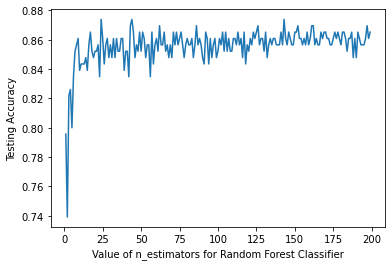

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')


In [9]:
import pickle
file = open('class.pkl','wb')
pickle.dump(regressor, file)

-------------------------*Exporting the ML-classification model*--------------------------- 